# REDES NEURAIS ARTIFICIAIS

[Aula 3 de Deep Learning](http://bit.ly/dn-unb03) da Engenharia de Software da UnB

# Parte 1 - Pré-processamento dos Dados

### Importar as libs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.4.1'

### Importar o dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [5]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/kisobral/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kisobral/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kisobral/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
np.shape(X_train)

(8000, 12)

---
# Parte 2 -Vamos construir uma ANN!


### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the second hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [12]:
ann.add(tf.keras.layers.Dense(units=12, activation='tanh'))

### Adding the output layer

In [13]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [14]:
ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [21]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 128)

Epoch 1/124
250/250 [==============================] - 0s 732us/step - loss: 0.3161 - accuracy: 0.8715
Epoch 2/124
250/250 [==============================] - 0s 761us/step - loss: 0.3159 - accuracy: 0.8706
Epoch 3/124
250/250 [==============================] - 0s 736us/step - loss: 0.3157 - accuracy: 0.8716
Epoch 4/124
250/250 [==============================] - 0s 699us/step - loss: 0.3152 - accuracy: 0.8712
Epoch 5/124
250/250 [==============================] - 0s 697us/step - loss: 0.3160 - accuracy: 0.8716
Epoch 6/124
250/250 [==============================] - 0s 725us/step - loss: 0.3157 - accuracy: 0.8706
Epoch 7/124
250/250 [==============================] - 0s 726us/step - loss: 0.3156 - accuracy: 0.8704
Epoch 8/124
250/250 [==============================] - 0s 702us/step - loss: 0.3163 - accuracy: 0.8696
Epoch 9/124
250/250 [==============================] - 0s 688us/step - loss: 0.3156 - accuracy: 0.8721
Epoch 10/124
250/250 [==============================] - 0s 665us/step - l

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [16]:
y_pred = ann.predict(X_test)
y_pred

array([[0.3486461 ],
       [0.54768556],
       [0.13423848],
       ...,
       [0.23661518],
       [0.33044568],
       [0.1833097 ]], dtype=float32)

In [17]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Criando uma Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1479  116]
 [ 177  228]]


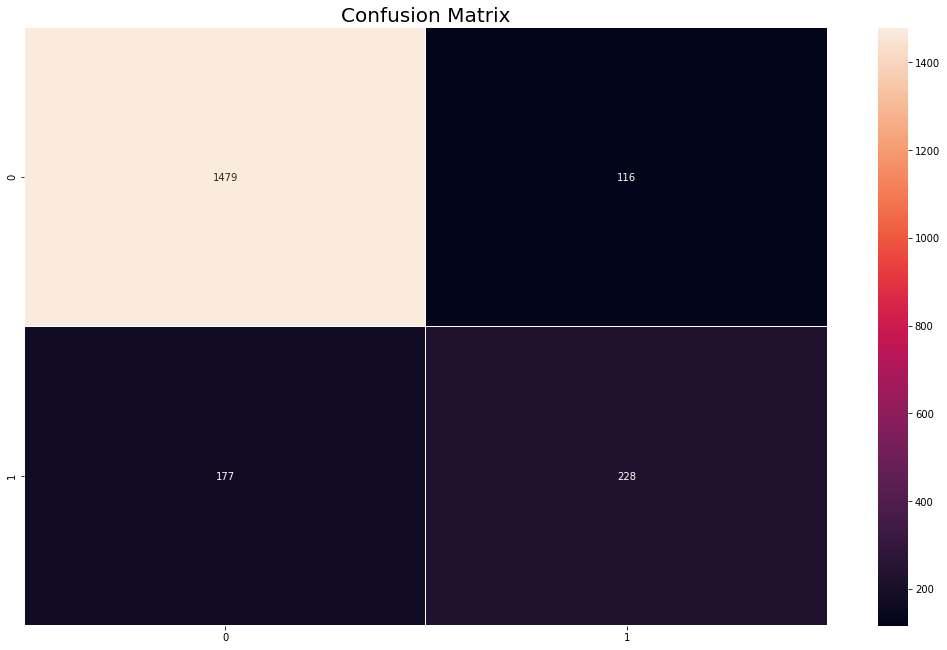

In [19]:
plt.figure(figsize=(18,11))
plt.title("Confusion Matrix", fontsize=20)
ax = sns.heatmap(
    cm,
    annot=True,
    linewidths=.01,
    fmt='.0f'
)

# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)